In [ ]:
%pip install --upgrade google-genai

In [4]:
from dotenv import load_dotenv
load_dotenv(".env", override=True)

True

In [5]:
import os

In [8]:
from google import genai
from google.genai.types import HttpOptions

client = genai.Client(
    http_options=HttpOptions(api_version="v1"), 
    vertexai=False, # only works if billing is enabled. I had to make this false to use older version of gemini api
    api_key=os.getenv("GEMINI_API_KEY") # not needed if gcloud acc is setup with billing enabled.
)
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="How does AI work?",
)
print(response.text)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


AI, or Artificial Intelligence, works by enabling computer systems to perform tasks that typically require human intelligence. Instead of being explicitly programmed for every single scenario, AI systems **learn** from data, identify patterns, and make predictions or decisions based on what they've learned.

Here's a breakdown of the core concepts:

### The Core Idea: Learning from Data

At its heart, AI (especially modern AI) is about **pattern recognition and prediction**. It's less about "thinking" like a human and more about finding complex relationships in vast amounts of data.

Think of it like teaching a child a new skill:

1.  **Data (Experience):** You show the child many examples (e.g., hundreds of pictures of cats and dogs, labeled "cat" or "dog").
2.  **Algorithm (Learning Method):** The child tries to figure out what makes a cat a cat, and a dog a dog (e.g., pointed ears vs. floppy ears, whiskers, tail wagging, size). This is the internal "method" they use to learn.
3.  **

In [1]:
from google.api_core.client_options import ClientOptions
from google.cloud import documentai  # type: ignore

# TODO(developer): Uncomment these variables before running the sample.
project_id = "gen-lang-client-0725014924"
location = 'eu' # Format is 'us' or 'eu'


def fetch_processor_types_sample(project_id: str, location: str) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location
    parent = client.common_location_path(project_id, location)

    # Fetch all processor types
    response = client.fetch_processor_types(parent=parent)

    print("Processor types:")
    # Print the available processor types
    for processor_type in response.processor_types:
        if processor_type.allow_creation:
            print(processor_type.type_)


In [2]:
fetch_processor_types_sample(project_id=project_id, location=location)

Processor types:
INVOICE_PROCESSOR
CUSTOM_EXTRACTION_PROCESSOR
FORM_PARSER_PROCESSOR
OCR_PROCESSOR
FORM_W2_PROCESSOR
FORM_W9_PROCESSOR
PAYSTUB_PROCESSOR
BANK_STATEMENT_PROCESSOR
CUSTOM_CLASSIFICATION_PROCESSOR
UTILITY_PROCESSOR
EXPENSE_PROCESSOR
CUSTOM_SPLITTING_PROCESSOR
US_DRIVER_LICENSE_PROCESSOR
US_PASSPORT_PROCESSOR
ID_PROOFING_PROCESSOR
SUMMARY_PROCESSOR
LAYOUT_PARSER_PROCESSOR


In [4]:


# TODO(developer): Uncomment these variables before running the sample.
# project_id = 'YOUR_PROJECT_ID'
# location = 'YOUR_PROCESSOR_LOCATION' # Format is 'us' or 'eu'
processor_display_name = 'test_ocr_processor' # Must be unique per project, e.g.: 'My Processor'
processor_type = 'OCR_PROCESSOR' # Use fetch_processor_types to get available processor types


def create_processor_sample(
    project_id: str, location: str, processor_display_name: str, processor_type: str
) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location
    parent = client.common_location_path(project_id, location)

    # Create a processor
    processor = client.create_processor(
        parent=parent,
        processor=documentai.Processor(
            display_name=processor_display_name, type_=processor_type
        ),
    )

    # Print the processor information
    print(f"Processor Name: {processor.name}")
    print(f"Processor Display Name: {processor.display_name}")
    print(f"Processor Type: {processor.type_}")

create_processor_sample(project_id, location, processor_display_name, processor_type)

Processor Name: projects/5460750960/locations/eu/processors/9668efd6f09d2ff1
Processor Display Name: test_ocr_processor
Processor Type: OCR_PROCESSOR


In [ ]:
# TODO(developer): Uncomment these variables before running the sample.
# project_id = 'YOUR_PROJECT_ID'
# location = 'YOUR_PROCESSOR_LOCATION' # Format is 'us' or 'eu'


def list_processors_sample(project_id: str, location: str) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location
    parent = client.common_location_path(project_id, location)

    # Make ListProcessors request
    processor_list = client.list_processors(parent=parent)

    # Print the processor information
    for processor in processor_list:
        print(f"Processor Name: {processor.name}")
        print(f"Processor Display Name: {processor.display_name}")
        print(f"Processor Type: {processor.type_}")
        print("")
list_processors_sample(project_id, location)

Processor Name: projects/5460750960/locations/eu/processors/9668efd6f09d2ff1
Processor Display Name: test_ocr_processor
Processor Type: OCR_PROCESSOR



In [6]:
from google.api_core.exceptions import FailedPrecondition

def enable_processor_sample(project_id: str, location: str, processor_id: str) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location/processors/processor_id
    processor_name = client.processor_path(project_id, location, processor_id)
    request = documentai.EnableProcessorRequest(name=processor_name)

    # Make EnableProcessor request
    try:
        operation = client.enable_processor(request=request)

        # Print operation name
        print(operation.operation.name)
        # Wait for operation to complete
        operation.result()
    # Cannot enable a processor that is already enabled
    except FailedPrecondition as e:
        print(e.message)

enable_processor_sample(project_id, location, processor_id="9668efd6f09d2ff1")


Processor state cannot be changed to 'ENABLING' since it is 'ENABLED'.


In [ ]:
from google.cloud import documentai_v1
from pdf2image import convert_from_path
from io import BytesIO

project_id = "gen-lang-client-0725014924"

# Processor ID as hexadecimal characters.
# Not to be confused with the Processor Display Name.
processor_id = "9668efd6f09d2ff1"

# Processor location. For example: "us" or "eu".
location = "eu"

# Path for file to process.
file_path = "data/class_11_physics_ncert/keph201.pdf"

# Set `api_endpoint` if you use a location other than "us".
opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

# Initialize Document AI client.
client = documentai_v1.DocumentProcessorServiceClient(client_options=opts)

# Get the Fully-qualified Processor path.
full_processor_name = client.processor_path(project_id, location, processor_id)

# Get a Processor reference.
request = documentai_v1.GetProcessorRequest(name=full_processor_name)
processor = client.get_processor(request=request)

# `processor.name` is the full resource name of the processor.
# For example: `projects/{project_id}/locations/{location}/processors/{processor_id}`
print(f"Processor Name: {processor.name}")

# Import pdf2image if not already imported

# Convert PDF pages to images
images = convert_from_path(file_path)

# Convert first page to bytes for processing
image_bytes = BytesIO()
images[0].save(image_bytes, format='PNG')
image_content = image_bytes.getvalue()


images[0]

In [ ]:
# Load binary data.
# For supported MIME types, refer to https://cloud.google.com/document-ai/docs/file-types
raw_document = documentai_v1.RawDocument(
    content=image_content,
    mime_type="image/png",
)

# Send a request and get the processed document.
request = documentai_v1.ProcessRequest(name=processor.name, raw_document=raw_document)
result = client.process_document(request=request)
document = result.document

# Read the text recognition output from the processor.
# For a full list of `Document` object attributes, reference this page:
# https://cloud.google.com/document-ai/docs/reference/rest/v1/Document
print("The document contains the following text:")
print(document.text)

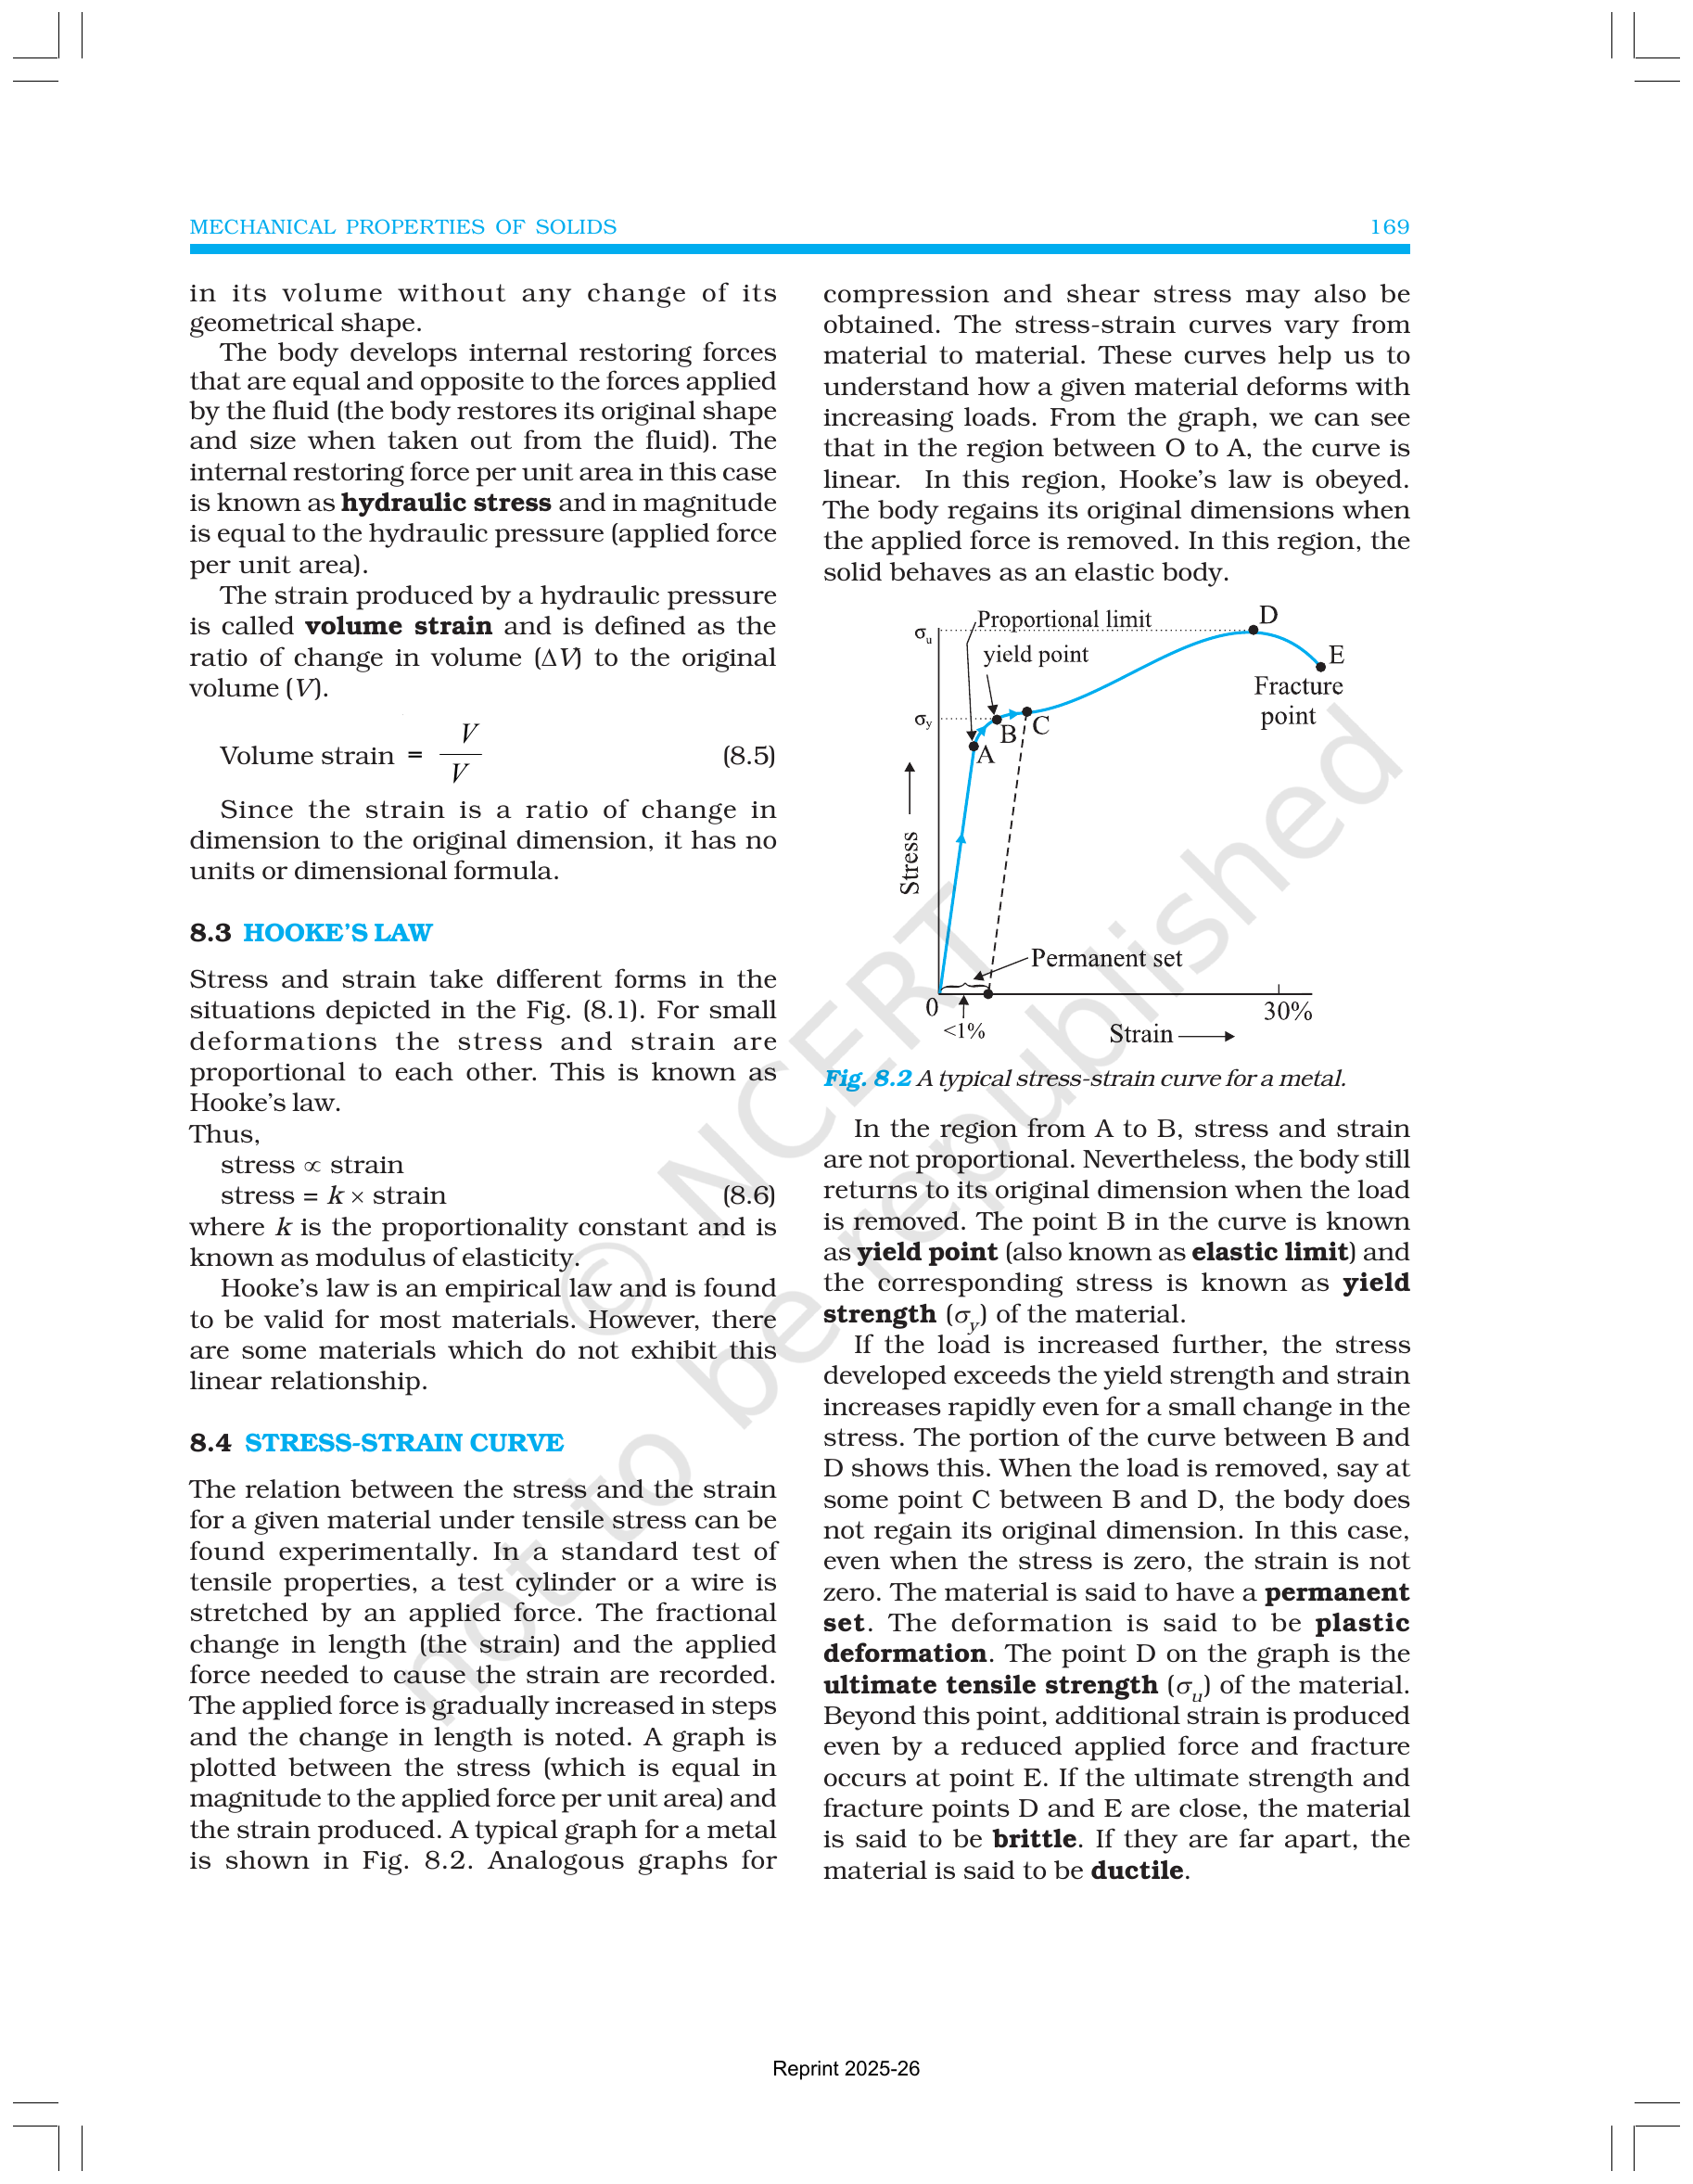

In [7]:
from pdf2image import convert_from_path

file_path = "data/class_11_physics_ncert/keph201.pdf"
images = convert_from_path(file_path)

# Convert first page to bytes for processing
# image_bytes = BytesIO()
# images[0].save(image_bytes, format="PNG")
images[2]


In [4]:
import numpy as np

In [36]:
import cv2
from doclayout_yolo import YOLOv10
from huggingface_hub import hf_hub_download

# Load the pre-trained model
filepath = hf_hub_download(
    repo_id="juliozhao/DocLayout-YOLO-DocStructBench",
    filename="doclayout_yolo_docstructbench_imgsz1024.pt",
)
model = YOLOv10(filepath)

# Perform prediction
det_res = model.predict(
    np.asarray(images[2]),  # Image to predict
    imgsz=1024,  # Prediction image size
    conf=0.2,  # Confidence threshold
    device="mps",  # Device to use (e.g., 'cuda:0' or 'cpu')
)

# Annotate and save the result
annotated_frame = det_res[0].plot(pil=True, line_width=5, font_size=20)
cv2.imwrite("result.jpg", annotated_frame)



0: 1024x800 2 titles, 12 plain texts, 3 abandons, 1 figure, 1 figure_caption, 1 isolate_formula, 2 formula_captions, 223.1ms
Speed: 17.7ms preprocess, 223.1ms inference, 31.1ms postprocess per image at shape (1, 3, 1024, 800)


True

In [13]:
det_res[0].names

{0: 'title',
 1: 'plain text',
 2: 'abandon',
 3: 'figure',
 4: 'figure_caption',
 5: 'table',
 6: 'table_caption',
 7: 'table_footnote',
 8: 'isolate_formula',
 9: 'formula_caption'}

In [16]:
det_res[0].boxes

doclayout_yolo.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 8., 0., 2., 4., 0., 9., 9., 2., 1., 2., 1.], device='mps:0')
conf: tensor([0.9833, 0.9829, 0.9819, 0.9802, 0.9779, 0.9778, 0.9715, 0.9704, 0.9621, 0.9580, 0.9574, 0.9251, 0.9158, 0.9122, 0.9038, 0.9012, 0.8930, 0.8733, 0.8716, 0.8349, 0.8085, 0.7940], device='mps:0')
data: tensor([[8.8589e+02, 1.4342e+03, 1.5256e+03, 2.0332e+03, 9.8335e-01, 1.0000e+00],
        [8.8696e+02, 1.2010e+03, 1.5241e+03, 1.4329e+03, 9.8294e-01, 1.0000e+00],
        [8.8600e+02, 3.0143e+02, 1.5248e+03, 6.3281e+02, 9.8194e-01, 1.0000e+00],
        [2.0288e+02, 3.6491e+02, 8.4000e+02, 6.2474e+02, 9.8018e-01, 1.0000e+00],
        [2.0335e+02, 6.2671e+02, 8.3913e+02, 7.5799e+02, 9.7788e-01, 1.0000e+00],
        [2.0423e+02, 1.5902e+03, 8.4136e+02, 2.0253e+03, 9.7776e-01, 1.0000e+00],
        [2.0367e+02, 1.3745e+03, 8.4037e+02, 1.5055e+03, 9.7154e-01, 1.0000e+00],
        [2.0377e+02, 8.5706e+02, 8

In [37]:
for label, xyxy in zip(det_res[0].boxes.cls, det_res[0].boxes.xyxy):
    if (
        det_res[0].names[int(label.item())] == "figure"
        or det_res[0].names[int(label.item())] == "isolate_formula"
    ):
        images[2].crop(box=xyxy.tolist()).show()


In [1]:
print("Here are two different variations of a worksheet, each with 5 questions, based on the provided chapter \"Mechanical Properties of Solids.\"\n\n---\n\n**Worksheet 1: Introduction to Mechanical Properties of Solids**\n\n**Instructions:** Answer the following questions based on the chapter \"Mechanical Properties of Solids.\"\n\n1.  **Define Elasticity and Plasticity:** In your own words, define \"elasticity\" and \"plasticity\" as described in the chapter. Provide a simple example of a material exhibiting each property.\n2.  **Understanding Stress:** What is stress in the context of mechanical properties of solids? Explain the difference between \"tensile stress\" and \"compressive stress.\"\n3.  **Hooke's Law:** State Hooke's Law. What is the name of the constant of proportionality that relates stress and strain in this law?\n4.  **Stress-Strain Curve (Proportional Limit):** Based on the stress-strain curve, what significant characteristic defines the \"proportional limit\" region (O to A)? What happens to the body in this region when the applied force is removed?\n5.  **Types of Strain:** Define \"strain.\" Name and briefly describe two different types of strain mentioned in the chapter, along with their associated deformations.\n\n---\n\n**Worksheet 2: Elastic Moduli and Applications**\n\n**Instructions:** Answer the following questions based on the chapter \"Mechanical Properties of Solids,\" referring to the provided tables if necessary.\n\n1.  **Young's Modulus and Material Strength:** Define Young's Modulus (Y). According to Table 8.1, which material (Aluminium, Copper, Iron, or Steel) has the highest Young's modulus? What does a high Young's modulus generally imply about a material's resistance to tensile or compressive deformation?\n2.  **Shear Modulus and Its Application:** What is the shear modulus (G) or modulus of rigidity? Explain why shear stress and shear strain are primarily relevant for solids and not typically for liquids or gases.\n3.  **Bulk Modulus and Compressibility:** What does the bulk modulus (B) measure? Based on the information in the chapter, how do the bulk moduli of solids compare to those of liquids and gases?\n4.  **Elastic Behavior in Engineering Design:** Provide at least two real-world examples from the chapter where the knowledge of elastic properties of materials is crucial in engineering design. Briefly explain why it is important in each case.\n5.  **Ductile vs. Brittle Materials:** Using the stress-strain curve (Fig. 8.2), explain the difference between a \"brittle\" material and a \"ductile\" material in terms of their ultimate tensile strength and fracture points.")

Here are two different variations of a worksheet, each with 5 questions, based on the provided chapter "Mechanical Properties of Solids."

---

**Worksheet 1: Introduction to Mechanical Properties of Solids**

**Instructions:** Answer the following questions based on the chapter "Mechanical Properties of Solids."

1.  **Define Elasticity and Plasticity:** In your own words, define "elasticity" and "plasticity" as described in the chapter. Provide a simple example of a material exhibiting each property.
2.  **Understanding Stress:** What is stress in the context of mechanical properties of solids? Explain the difference between "tensile stress" and "compressive stress."
3.  **Hooke's Law:** State Hooke's Law. What is the name of the constant of proportionality that relates stress and strain in this law?
4.  **Stress-Strain Curve (Proportional Limit):** Based on the stress-strain curve, what significant characteristic defines the "proportional limit" region (O to A)? What happens to the 

In [ ]:
from google.adk.tools import 